# 1. Data Collection

### Explanation:
i. Loading the dataset: We load the CSV file into a DataFrame using pandas.

ii. Display: Checking the first few rows ensures the dataset is loaded correctly.

iii. Missing values: Identifying columns with missing data helps plan data cleaning strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
gdp = pd.read_csv("C:/Users/DELL/Desktop/gdpWorld.csv")
gdp.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
gdp = gdp[['Country','Population','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)', 'Industry','Service']]
gdp.columns = ['Country','Population','GDP','Literacy','Phones_per_1000','Arable', 'Industry','Service']

In [4]:
gdp.head()

,Country,Population,GDP,Literacy,Phones_per_1000,Arable,Industry,Service
0,Afghanistan,31056997,700.0,"36,0","3,2","12,13","0,24","0,38"
1,Albania,3581655,4500.0,"86,5","71,2","21,09","0,188","0,579"
2,Algeria,32930091,6000.0,"70,0","78,1","3,22","0,6","0,298"
3,American Samoa,57794,8000.0,"97,0","259,5",10,NaN,NaN
4,Andorra,71201,19000.0,"100,0","497,2","2,22",NaN,NaN


In [5]:
gdp.dtypes

Country             object
Population           int64
GDP                float64
Literacy            object
Phones_per_1000     object
Arable              object
Industry            object
Service             object
dtype: object

In [6]:
gdp.replace(',','.',regex=True, inplace=True)
gdp.head()

,Country,Population,GDP,Literacy,Phones_per_1000,Arable,Industry,Service
0,Afghanistan,31056997,700.0,36.0,3.2,12.13,0.24,0.38
1,Albania,3581655,4500.0,86.5,71.2,21.09,0.188,0.579
2,Algeria,32930091,6000.0,70.0,78.1,3.22,0.6,0.298
3,American Samoa,57794,8000.0,97.0,259.5,10,NaN,NaN
4,Andorra,71201,19000.0,100.0,497.2,2.22,NaN,NaN


In [7]:
gdp = gdp.astype({ 'Literacy': 'float64','Phones_per_1000': 'float64', 'Arable': 'float64','Industry': 'float64', 'Service': 'float64'})

In [8]:
gdp.dtypes

Country             object
Population           int64
GDP                float64
Literacy           float64
Phones_per_1000    float64
Arable             float64
Industry           float64
Service            float64
dtype: object

In [9]:
gdp.isnull().sum()

Country             0
Population          0
GDP                 1
Literacy           18
Phones_per_1000     4
Arable              2
Industry           16
Service            15
dtype: int64

# 2. Data Preparation

### Explanation:

i. Missing values: Filling missing values with column means is a simple imputation technique.

ii. Duplicates: Removing duplicate entries ensures the data's integrity.

iii. Feature selection: Choosing six relevant features based on domain knowledge or statistical analysis.

iv. Splitting data: Dividing the dataset into training and testing sets.

v. Scaling: Standardizing the features to have a mean of 0 and a standard deviation of 1, which helps many machine learning algorithms perform better.

In [10]:
gdp.fillna(gdp.mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13388\2052533047.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp.fillna(gdp.mean(), inplace=True)


In [11]:
gdp.drop_duplicates(inplace=True)

In [12]:
# Feature selection based on domain knowledge or correlation analysis
features = ['Population', 'Literacy', 'Phones_per_1000', 'Arable', 'Industry', 'Service']
X= gdp[features]
Y =gdp['GDP']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Top GDP Countries

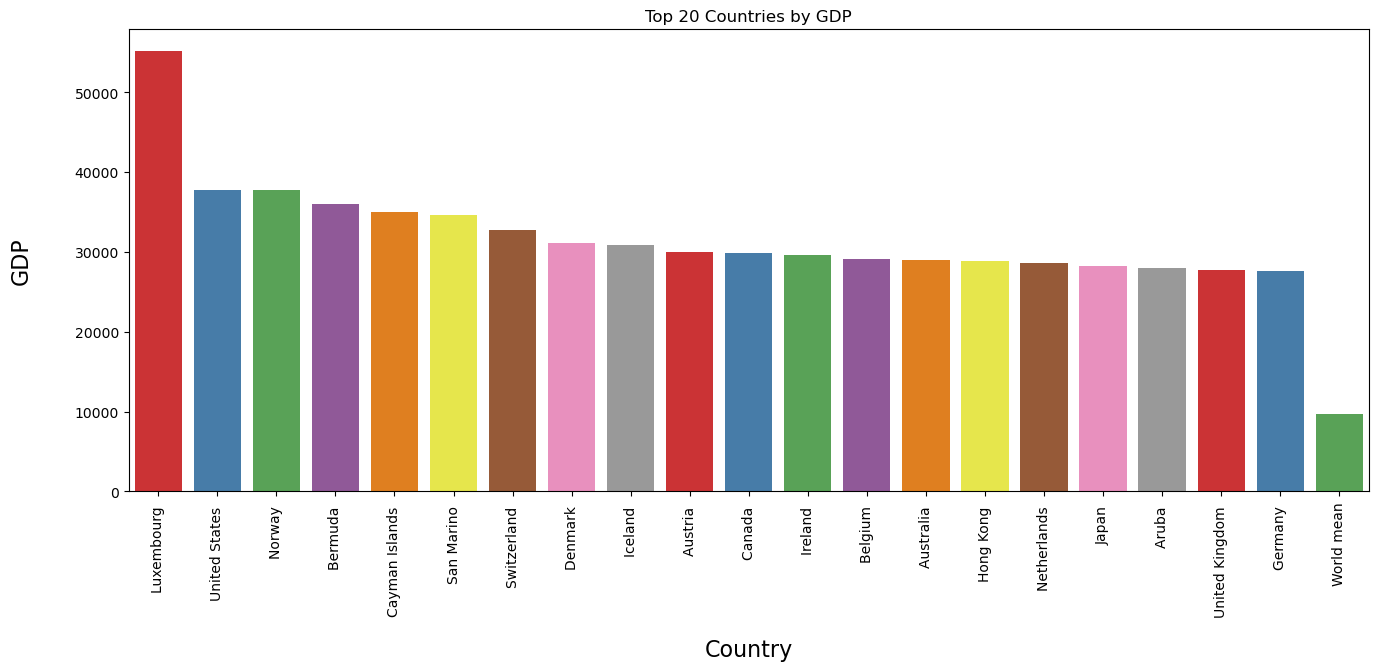

In [15]:
fig, ax = plt.subplots(figsize=(16, 6))
top_gdp_countries = gdp.sort_values('GDP', ascending=False).head(20)
mean = pd.DataFrame({'Country': ['World mean'], 'GDP': [gdp['GDP'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country', 'GDP']], mean], ignore_index=True)

sns.barplot(x='Country', y='GDP', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.title("Top 20 Countries by GDP")
plt.show()

### Scatter plots of selected features

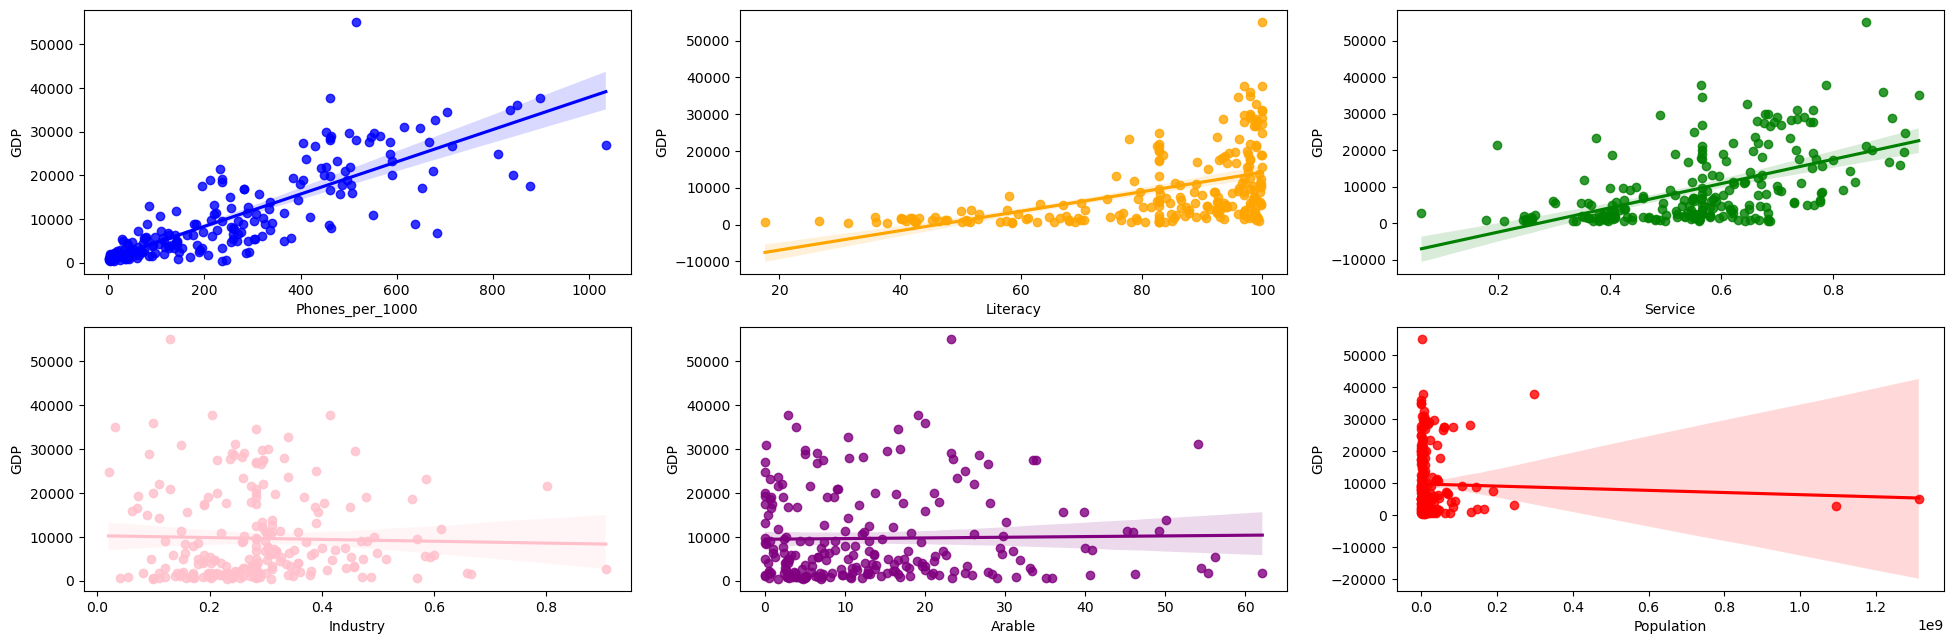

In [16]:
plt.figure(figsize=(24, 24))

plt.subplot(6, 3, 1)
sns.regplot(x='Phones_per_1000', y='GDP', data=gdp, color='blue')

plt.subplot(6, 3, 2)
sns.regplot(x='Literacy', y='GDP', data=gdp, color='orange')

plt.subplot(6, 3, 3)
sns.regplot(x='Service', y='GDP', data=gdp, color='green')

plt.subplot(6, 3, 4)
sns.regplot(x='Industry', y='GDP', data=gdp, color='pink')

plt.subplot(6, 3, 5)
sns.regplot(x='Arable', y='GDP', data=gdp, color='purple')

plt.subplot(6, 3, 6)
sns.regplot(x='Population', y='GDP', data=gdp, color='red')
plt.show()

###  Feature Correlation Heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_3860\3453690361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gdp.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Text(0.5, 1.0, 'Feature Correlation Heatmap')

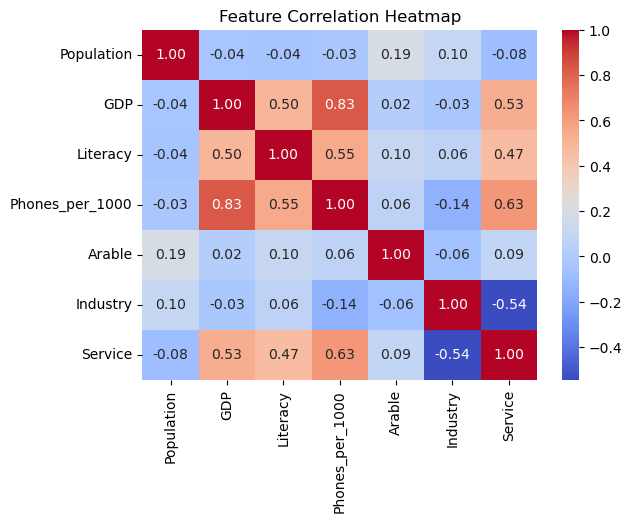

In [17]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.heatmap(gdp.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')

# 3. Algorithm Understanding

#### 1. Linear Regression: 
    This model assumes a linear relationship between the independent variables and the dependent variable (GDP). 
    It is easy to interpret and understand.
    
#### 2. Non-linear Models: 
    Models like Random Forest can capture more complex relationships by creating multiple decision trees and averaging their predictions. 
    Understanding these models involves knowing how they handle overfitting, feature importance, and interactions between              features.

# 4. Model Development 

### i). Linear Regression:
Fitting a simple linear model and evaluating its performance using MSE and R-squared.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)

Y_pred_lin = lin_reg.predict(X_test_scaled)

mse_lin = mean_squared_error(Y_test, Y_pred_lin)
r2_lin = r2_score(Y_test, Y_pred_lin)

print(f"Linear Regression - MSE: {mse_lin}, R2: {r2_lin}")

Linear Regression - MSE: 21313871.090490017, R2: 0.7436866498106052


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted GDP')

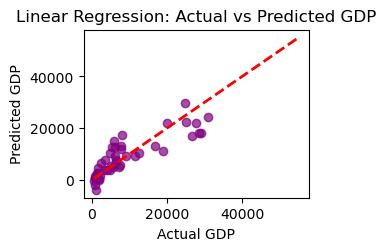

In [19]:
# Actual vs Predicted GDP - Linear Regression
plt.subplot(2, 2, 3)
plt.scatter(Y_test, Y_pred_lin, alpha=0.7, color='purple')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--r', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Linear Regression: Actual vs Predicted GDP')

### ii). Non-linear Model (Random Forest):
Random Forest: Fitting a more complex model that can capture non-linear relationships and evaluating its performance.

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, Y_train)

Y_pred_rf = rf_reg.predict(X_test_scaled)

mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 14435828.823742626, R2: 0.8263996421454833


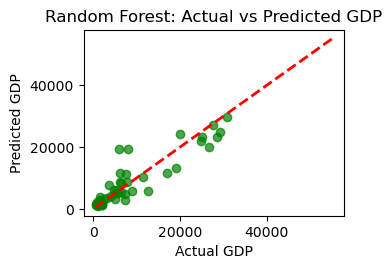

In [21]:
# Actual vs Predicted GDP - Random Forest
plt.subplot(2, 2, 4)
plt.scatter(Y_test, Y_pred_rf, alpha=0.7, color='green')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--r', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Random Forest: Actual vs Predicted GDP')

plt.tight_layout()
plt.show()

# 5. Model Tuning 
### Hyperparameter tuning for Random Forest

### Explanation:
Grid Search: Testing different hyperparameter combinations to find the best settings for the Random Forest model.

Evaluation: Using the best model to predict and evaluate its performance.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, Y_train)
best_rf = grid_search.best_estimator_

# Predictions with the best estimator
Y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluation
mse_best_rf = mean_squared_error(Y_test, Y_pred_best_rf)
r2_best_rf = r2_score(Y_test, Y_pred_best_rf)
print(f"Best Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest - MSE: 11980829.623746613, R2: 0.8559226258865282


# 6. Model Evaluation 

### Explanation:
Comparison: Comparing MSE and R-squared for both models and the tuned Random Forest model.

Insights: Discussing why one model performs better, considering aspects like complexity, overfitting, and the ability to capture non-linear relationships.

In [23]:
print(f"Linear Regression - MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Best Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")

Linear Regression - MSE: 21313871.090490017, R2: 0.7436866498106052
Random Forest - MSE: 14435828.823742626, R2: 0.8263996421454833
Best Random Forest - MSE: 11980829.623746613, R2: 0.8559226258865282


### i). Comparison of MSE 

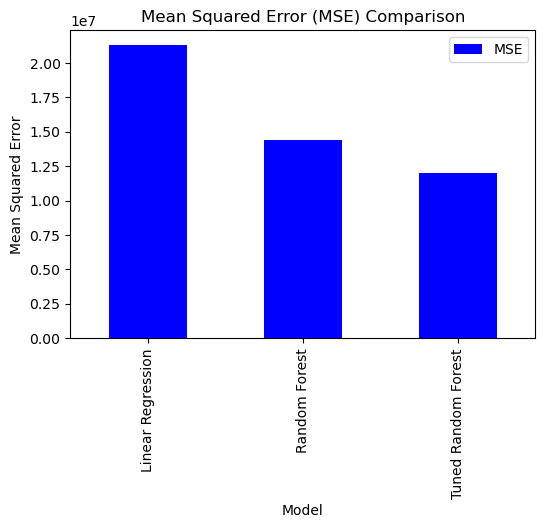

In [24]:
mse_lin = 21313871.090490017
mse_rf = 14435828.823742626
mse_best_rf = 11980829.623746613

mse_data = pd.DataFrame({
    "MSE": [mse_lin, mse_rf, mse_best_rf]
}, index=["Linear Regression", "Random Forest", "Tuned Random Forest"])

ax = mse_data.plot(kind="bar", figsize=(6,4), color = ["blue", "green", "orange"])
plt.title("Mean Squared Error (MSE) Comparison")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.legend(['MSE'], loc='upper right')
plt.show()


### ii). Comparison of R-squared

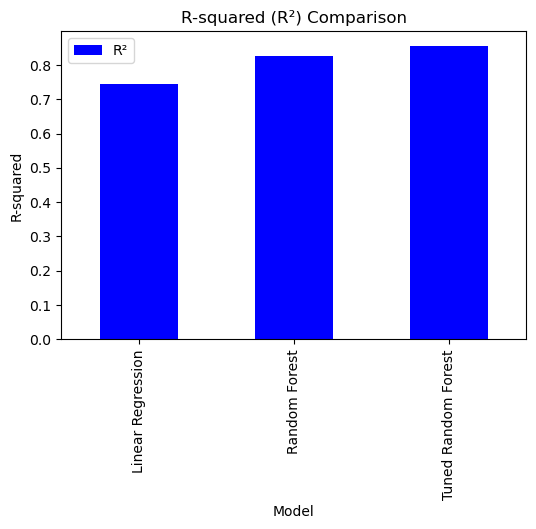

In [25]:
r2_lin = 0.7436866498106052
r2_rf = 0.8263996421454833
r2_best_rf = 0.8559226258865282

r2_data = pd.DataFrame({
    "R2": [r2_lin, r2_rf, r2_best_rf]
}, index=["Linear Regression", "Random Forest", "Tuned Random Forest"])

ax = r2_data.plot(kind="bar", figsize=(6,4), color=['blue', 'green', 'orange'])
plt.title("R-squared (R²) Comparison")
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.legend(['R²'], loc='upper left')
plt.show()